In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time

In [159]:
class N_Armed_Bandit():
    
    def __init__(self,game,play,
                 n_arms,epsilons,
                 burning_period):
        
        # times of game
        self.game = game
        
        # times of playround during each game
        self.play = play
        
        # how many levers
        self.n_arms = n_arms
        
        # epsilon-greedy method
        self.epsilons = epsilons
        
        # how many rounds of burning period are included during the simulation
        self.burning_period = burning_period
        
        # n_unique of epsilon decisdes how many methods are competing
        self.n_group = len(epsilons)
        
    def __DataRestoration(self):
        
        # True rewards, fixed for each game
        self.true_rwd = np.random.normal(0,1,self.n_arms)
        
        # Estimated reward, update after each play
        self.estimated_rwd = np.zeros((self.n_group,self.n_arms))
        
        # Record total reward of each action, update after each play
        self.acc_action_rwd = np.zeros((self.n_group,self.n_arms))           
        
        # Track the times each action taken
        self.action_times = np.zeros((self.n_group,self.n_arms))
        
        # Track the optimal action reward
        self.optimal_action_rwd_track = np.zeros((self.n_group,self.play))
        
        # Track the accumulated reward during the play
        self.acc_rwd_track = np.zeros((self.n_group,self.play))
        
    def Choose_action(self,p):
        
        prob = np.random.uniform(0,1)
        
        if p < self.burning_period:
            
            a = np.random.randint(0,self.n_arms,self.n_group)
            exploiting = a
            
        else:
            a = []
            exploiting = []
            for i in range(self.n_group):
                
                if self.epsilons[i]==0:
                    a_temp = int(np.argmax(self.estimated_rwd[i,:]))
                    a.append(a_temp)
                    exploiting.append(a_temp)
                    
                # strategy of epsilon-greedy method
                else:
                    exploring = list(range(self.n_arms))
                    exploiting_temp = np.argmax(self.estimated_rwd[i,:])
                    exploring.remove(exploiting_temp)
                    a_temp = int((prob<=self.epsilons[i])*np.random.choice(exploring))+int((prob>self.epsilons[i])*exploiting_temp)
                    a.append(a_temp)
                    exploiting.append(exploiting_temp)
                
        return a,exploiting
    
    def Update_Rewards(self,a,p,exploiting):
        
        for i in range(self.n_group):

            # update action times taken
            self.action_times[i,a[i]] += 1

            # update accumulated rewards of each action
            self.acc_action_rwd[i,a[i]] += np.random.normal(self.true_rwd[a[i]],1)

            # update estimated reward of each action
            self.estimated_rwd[i,a[i]] = self.acc_action_rwd[i,a[i]]/self.action_times[i,a[i]]
            
            if p==0:
                # update optimal action reward
                self.optimal_action_rwd_track[i,p] = np.random.normal(self.true_rwd[exploiting[i]],1)
            else:
                self.optimal_action_rwd_track[i,p] = (p*(self.optimal_action_rwd_track[i,p-1])+np.random.normal(self.true_rwd[exploiting[i]],1))/(p+1)         
            
        # record the accumulated reward
        self.acc_rwd_track[:,p] = self.acc_action_rwd.sum(axis=1)/(p+1)
    
    def ReadyPlayer1(self):
        
        # Track the accumulated reward after each game
        self.total_game_rwd_track = np.zeros((self.n_group,self.play))  
        
        # Track the accumulated reward after each game
        self.total_optimal_action_rwd_track = np.zeros((self.n_group,self.play)) 
        
        for g in range(self.game):
            
            start = time.time()
            
            # each game need new data restoration
            self.__DataRestoration()
            
            for p in range(self.play):
                
                a,exploiting=self.Choose_action(p)
                self.Update_Rewards(a,p,exploiting)
                
            self.total_game_rwd_track += self.acc_rwd_track  
            self.total_optimal_action_rwd_track += self.optimal_action_rwd_track
            
            end = time.time()
            print('game{} finished, time cost {}seconds'.format(g,np.round(end-start,4)))
            
        self.total_game_rwd_track = self.total_game_rwd_track/self.game
        self.total_optimal_action_rwd_track = self.total_optimal_action_rwd_track/self.game
        
        self.reward_data = pd.DataFrame(self.total_game_rwd_track[:,self.burning_period:]).T
        self.reward_data.columns = ['epsilon='+str(i) for i in self.epsilons]
        
        self.optimal_action = pd.DataFrame(self.total_optimal_action_rwd_track[:,self.burning_period:]).T
        self.optimal_action.columns = ['epsilon='+str(i) for i in self.epsilons]

In [160]:
RP1 = N_Armed_Bandit(game=50,play=4000,n_arms=10,epsilons=[0,0.01,0.05,0.1,0.3],burning_period=1)

In [161]:
RP1.ReadyPlayer1()

game0 finished, time cost 0.9235seconds
game1 finished, time cost 0.9254seconds
game2 finished, time cost 0.9533seconds
game3 finished, time cost 0.9655seconds
game4 finished, time cost 0.8856seconds
game5 finished, time cost 0.9182seconds
game6 finished, time cost 0.8789seconds
game7 finished, time cost 0.9099seconds
game8 finished, time cost 0.9011seconds
game9 finished, time cost 0.8688seconds
game10 finished, time cost 0.8801seconds
game11 finished, time cost 0.8861seconds
game12 finished, time cost 0.8842seconds
game13 finished, time cost 0.8845seconds
game14 finished, time cost 0.8791seconds
game15 finished, time cost 0.8779seconds
game16 finished, time cost 0.8917seconds
game17 finished, time cost 0.8894seconds
game18 finished, time cost 0.8858seconds
game19 finished, time cost 0.8835seconds
game20 finished, time cost 0.8821seconds
game21 finished, time cost 0.8892seconds
game22 finished, time cost 0.8937seconds
game23 finished, time cost 0.8821seconds
game24 finished, time cost

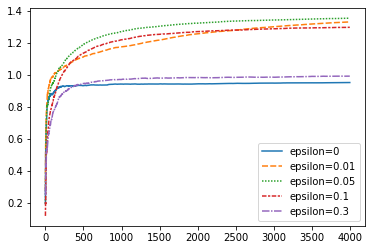

In [162]:
plt.figure()
sns.lineplot(data = RP1.reward_data)

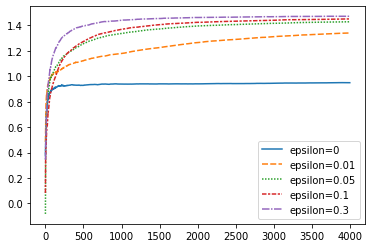

In [163]:
plt.figure()
sns.lineplot(data = RP1.optimal_action)

**Version1 Code**

In [85]:
game = 50
play = 2500
burning_period=1
n_action = 10
epsilon1 = 0
epsilon2 = 0.01
epsilon3 = 0.1

In [86]:
total_reward_track = np.zeros((3,play))

for g in range(game):
    
    # True rcewards, fixed for each game
    true_rwd = np.random.normal(0,1,n_action)
    
    # Estimated reward, update after each play
    estimated_rwd = np.zeros((3,n_action))

    # Record total reward of each action, update after each play
    acc_action_rwd = np.zeros((3,n_action))

    # Track the accumulated reward during the play
    acc_rwd_track = np.zeros((3,play))

    # Track the times each action taken
    action_times = np.zeros((3,10))

    for p in range(play):

        prob = np.random.uniform(0,1,2)

        if p < burning_period:
            
            a = np.random.randint(0,10,3)
            
        else:

            a1 = int(np.argmax(estimated_rwd[0,:]))
            
            exploring2,exploring3 = list(range(10)),list(range(10))
            exploiting2,exploiting3 = int(np.argmax(estimated_rwd[1,:])),int(np.argmax(estimated_rwd[2,:]))
            
            exploring2.remove(exploiting2)
            exploring3.remove(exploiting3)
            
            a2 = int((prob[0]<=epsilon2)*np.random.choice(exploring2))+int((prob[0]>epsilon2)*exploiting2)
            a3 = int((prob[1]<=epsilon3)*np.random.choice(exploring3))+int((prob[1]>epsilon3)*exploiting3)
            
            a = np.array([a1,a2,a3])

        for i in range(3):

            # update action times taken
            action_times[i,a[i]] += 1

            # update accumulated rewards of each action
            acc_action_rwd[i,a[i]] += np.random.normal(loc=true_rwd[a[i]],scale=1)

            # update estimated reward of each action
            estimated_rwd[i,a[i]] = acc_action_rwd[i,a[i]]/action_times[i,a[i]]

        # record the accumulated reward
        acc_rwd_track[:,p] = acc_action_rwd.sum(axis=1)/(p+1)
        
    total_reward_track+=acc_rwd_track
    
total_reward_track = total_reward_track/game

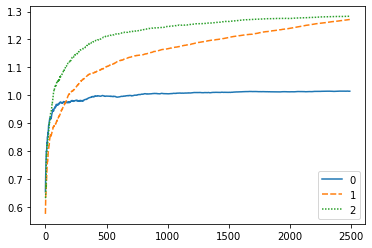

In [87]:
reward_data = pd.DataFrame(total_reward_track[:,10:]).T
plt.figure()
sns.lineplot(data = reward_data)